## Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn import preprocessing 
import itertools
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('../input/nlp-getting-started/train.csv')
test = pd.read_csv('../input/nlp-getting-started/test.csv')

<AxesSubplot:>

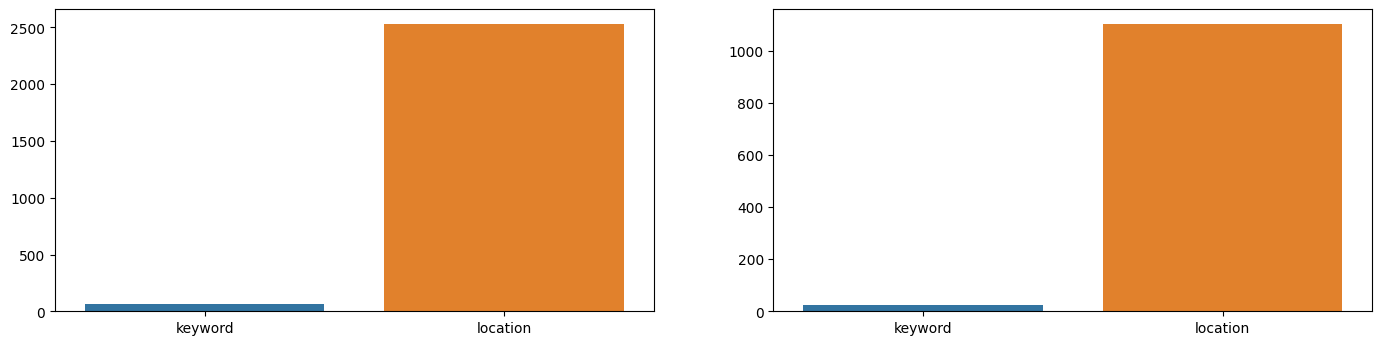

In [3]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

sns.barplot(x=train[missing_cols].isnull().sum().index, y=train[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=test[missing_cols].isnull().sum().index, y=test[missing_cols].isnull().sum().values, ax=axes[1])

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.shape

(7613, 5)

In [6]:
np.mean(train['target'])

0.4296597924602653

Text(0, 0.5, 'Count')

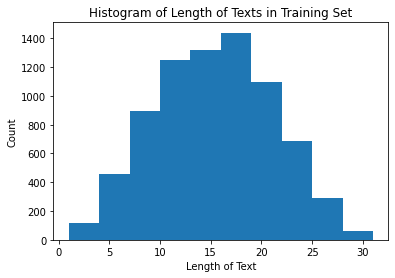

In [7]:
plt.hist([len(i.split()) for i in train['text']])
plt.title('Histogram of Length of Texts in Training Set')
plt.xlabel('Length of Text')
plt.ylabel('Count')

In [8]:
max(len(i.split()) for i in train['text'])

31

Text(0, 0.5, 'Count')

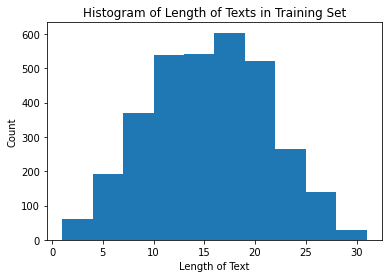

In [9]:
plt.hist([len(i.split()) for i in test['text']])
plt.title('Histogram of Length of Texts in Training Set')
plt.xlabel('Length of Text')
plt.ylabel('Count')

In [10]:
max(len(i.split()) for i in test['text'])

31

In [11]:
np.mean(train['keyword'].isna())

0.008012610009194798

In [12]:
np.mean(train['location'].isna())

0.33272034677525286

In [13]:
train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [14]:
len(train[train['keyword'] == 'fatalities'])

45

In [15]:
result = []
for word in train['keyword'].unique(): 
    result.append((word, len(train[train['keyword'] == word]), np.mean(train[train['keyword'] == word]['target'])))
    
sorted(result, key = lambda x : x[2], reverse = True)[:30]

[(nan, 0, nan),
 ('debris', 37, 1.0),
 ('derailment', 39, 1.0),
 ('wreckage', 39, 1.0),
 ('outbreak', 40, 0.975),
 ('oil%20spill', 38, 0.9736842105263158),
 ('typhoon', 38, 0.9736842105263158),
 ('suicide%20bombing', 33, 0.9696969696969697),
 ('suicide%20bomber', 31, 0.967741935483871),
 ('bombing', 29, 0.9310344827586207),
 ('rescuers', 35, 0.9142857142857143),
 ('suicide%20bomb', 35, 0.9142857142857143),
 ('nuclear%20disaster', 34, 0.9117647058823529),
 ('evacuated', 36, 0.8888888888888888),
 ('razed', 35, 0.8857142857142857),
 ('wildfire', 33, 0.8787878787878788),
 ('wild%20fires', 31, 0.8709677419354839),
 ('airplane%20accident', 35, 0.8571428571428571),
 ('buildings%20on%20fire', 33, 0.8484848484848485),
 ('mass%20murder', 33, 0.8484848484848485),
 ('forest%20fires', 32, 0.84375),
 ('bridge%20collapse', 35, 0.8285714285714286),
 ('casualties', 35, 0.8),
 ('drought', 35, 0.8),
 ('forest%20fire', 19, 0.7894736842105263),
 ('thunderstorm', 33, 0.7878787878787878),
 ('violent%20storm'

In [16]:
np.mean(train[train['keyword'].isna()]['target'])

0.6885245901639344

In [17]:
train['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [18]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [19]:
test.shape

(3263, 4)

In [20]:
test['keyword'].value_counts()

deluged               23
demolished            22
rubble                22
first%20responders    21
seismic               21
                      ..
threat                 5
fatalities             5
forest%20fire          5
inundation             4
epicentre              1
Name: keyword, Length: 221, dtype: int64

In [21]:
test['location'].value_counts()

New York                  38
USA                       37
Worldwide                 16
United States             15
London                    13
                          ..
Medford, NJ                1
Quezon City                1
LanÌ¼s                     1
USA,Washington,Seattle     1
Brussels, Belgium          1
Name: location, Length: 1602, dtype: int64

In [22]:
vect = TfidfVectorizer(min_df = 2, stop_words='english')
X = vect.fit_transform(train['text'])

In [23]:
X.shape

(7613, 6331)

In [24]:
len(vect.get_feature_names_out())

6331

In [25]:
important_words = vect.get_feature_names_out()
clean = []
for i,j in enumerate(train['text']):
    words = j.lower().split()
    clean_words = [word for word in words if word in important_words]
    clean_text = ' '.join(clean_words)
    train['text'][i] = clean_text

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [26]:
max(len(i.split()) for i in train['text'])

18

In [27]:
import tensorflow as tf
encoder = tf.keras.layers.TextVectorization()
encoder.adapt(train['text'])

2022-12-07 23:20:52.299516: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 23:20:52.418516: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 23:20:52.419333: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-07 23:20:52.421066: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [28]:
x = encoder(train['text']).numpy()

In [29]:
max_review_length = 18

In [30]:
y = train['target']

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
import tensorflow as tf 
tf.random.set_seed(7)

In [33]:
embedding_vetcor_length = 16
model = Sequential()
model.add(Embedding(6331, embedding_vetcor_length, input_length=18, mask_zero=True))
model.add(SimpleRNN(16))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 18, 16)            101296    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                528       
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 101,841
Trainable params: 101,841
Non-trainable params: 0
_________________________________________________________________


In [34]:
from tensorflow import keras

In [35]:
vectorize_layer = tf.keras.layers.TextVectorization()

In [36]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights = True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, callbacks = [callback], batch_size = 32,
                    validation_data=(x_val, y_val))

Epoch 1/10
191/191 [==============================] - 9s 34ms/step - loss: 0.6159 - accuracy: 0.6742 - val_loss: 0.5319 - val_accuracy: 0.7485
Epoch 2/10
191/191 [==============================] - 6s 31ms/step - loss: 0.3853 - accuracy: 0.8399 - val_loss: 0.5133 - val_accuracy: 0.7715
Epoch 3/10
191/191 [==============================] - 6s 33ms/step - loss: 0.2452 - accuracy: 0.9100 - val_loss: 0.5829 - val_accuracy: 0.7439
Epoch 4/10
191/191 [==============================] - 6s 31ms/step - loss: 0.1607 - accuracy: 0.9453 - val_loss: 0.6620 - val_accuracy: 0.7498


In [37]:
y_train.shape

(6090,)

In [38]:
y_vec = encoder(test['text']).numpy()

In [39]:
x_vec = encoder(train['text']).numpy()

In [40]:
x_vec.shape

(7613, 18)

In [41]:
x_preds = np.round(model.predict(x_vec))
x_preds = [int(i) for i in x_preds]

In [42]:
np.mean(x_preds == train['target'])

0.8886115854459478

In [43]:
y_vec.shape

(3263, 31)

In [44]:
preds = np.round(model.predict(y_vec))
preds = [int(i) for i in preds]

In [45]:
np.mean(preds)

0.39564817652467055

In [46]:
clean = []
for i,j in enumerate(test['text']):
    words = j.lower().split()
    clean_words = [word for word in words if word in important_words]
    clean_text = ' '.join(clean_words)
    test['text'][i] = clean_text

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
max(len(i.split()) for i in test['text'])

15

In [48]:
y_vec = encoder(test['text']).numpy()

In [49]:
y_vec.shape

(3263, 15)

In [50]:
preds = np.round(model.predict(y_vec))
preds = [int(i) for i in preds]

In [51]:
np.mean(preds)

0.34171008274593934

In [52]:
sub = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')
sub['target'] = preds
sub.head()

,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,1


In [53]:
sub.to_csv('submission.csv', index=False)

In [54]:
keywords = train['keyword'].unique()

In [55]:
len([word for word in keywords if word in important_words])

184

In [56]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason allah forgive,1
1,4,NaN,NaN,forest near la canada,1
2,5,NaN,NaN,residents asked evacuation shelter place order...,1
3,6,NaN,NaN,people receive evacuation orders california,1
4,7,NaN,NaN,just got sent photo smoke school,1


In [57]:
np.mean(np.round(model.predict(x_train)) == train['target'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


ValueError: ('Lengths must match to compare', (7613,), (6090, 1))

In [ ]:
vect = TfidfVectorizer(min_df = 20, stop_words='english')
X = vect.fit_transform(train['text'])

In [ ]:
X.shape

In [ ]:
X = X.toarray()

In [ ]:
len(train)

In [ ]:
len(pd.Series(' '.join(train['text']).lower().split()).value_counts())

In [ ]:
len(pd.Series(' '.join(test['text']).lower().split()).value_counts())

In [ ]:
tfidf = pd.DataFrame(X, columns = vect.get_feature_names_out())
pd.Series(tfidf.idxmax(axis=1)).value_counts()

In [ ]:
columns = vect.get_feature_names_out()
columns[:10]

In [ ]:
result = []
for j in [k.split() for k in train['text']]:
    result.append([i for i in j if i in vect.get_feature_names_out()])

In [ ]:
result = []
for i in [j.split() for j in train['text']]:
    for k in i:
        
        if k in vect.get_feature_names_out():
            result.append(np.array(tfidf[k]))

In [ ]:
result = np.array(result)
result.shape

In [ ]:
result

In [ ]:
len([i for i in enumerate(vect.get_feature_names_out())])

In [ ]:
result[0]

In [ ]:
result[1]

In [ ]:
for i in enumerate(vect.get_feature_names_out()[:10]):
    print(i)

In [ ]:
words = ' '.join(train['text']).lower().split()
len(pd.Series([word for word in words if word not in stop]).value_counts())

In [ ]:
#X = X.toarray()
sum((X != 0).sum(1) != 0)

In [ ]:
X = X[:, :, None]
X.shape

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
t = Tokenizer()


In [ ]:
y.shape

In [ ]:
np.mean(x_train)

In [ ]:
x_train.shape

In [ ]:
 x_train.shape[1:]

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape = x_train.shape[1:], return_sequences = True),
    keras.layers.SimpleRNN(1, activation='sigmoid')
])

model.summary()

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, callbacks = [callback], batch_size = 128,
                    validation_data=(x_val, y_val))